In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import findspark
import pyspark

from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from sklearn.decomposition import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

conf = SparkConf().setMaster("local").setAppName("big_data_project")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [2]:
training_data = pd.read_csv("train.csv")

training_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


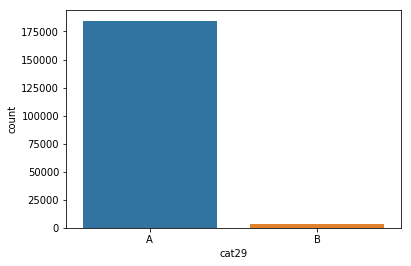

In [3]:
sns.countplot(x='cat29',data=training_data)
plt.show()

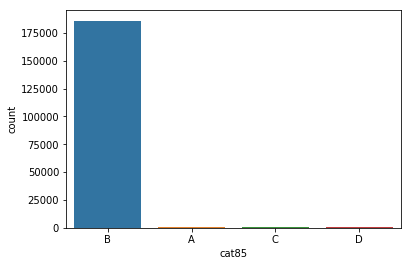

In [7]:
sns.countplot(x='cat85',data=training_data)
plt.show()

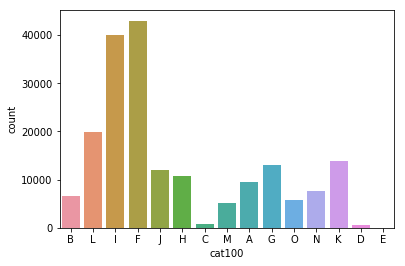

In [8]:
sns.countplot(x='cat100',data=training_data)
plt.show()

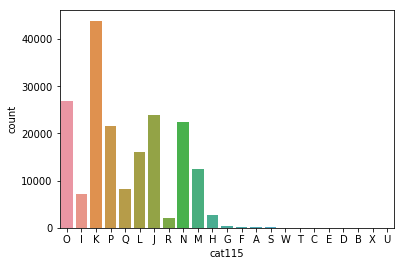

In [9]:
sns.countplot(x='cat115',data=training_data)
plt.show()

In [10]:
training_data.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
           ...   
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat110     object
cat111     object
cat112     object
cat113     object
cat114     object
cat115     object
cat116     object
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    

In [12]:
cat_1 = pd.get_dummies(training_data['cat1'])
cat_2 = pd.get_dummies(training_data['cat2'])
cat_3 = pd.get_dummies(training_data['cat3'])
cat_4 = pd.get_dummies(training_data['cat4'])
cat_5 = pd.get_dummies(training_data['cat5'])
cat_6 = pd.get_dummies(training_data['cat6'])
#cat_7 = pd.get_dummies(training_data['cat7'])
cat_8 = pd.get_dummies(training_data['cat8'])
cat_9 = pd.get_dummies(training_data['cat9'])
cat_10 = pd.get_dummies(training_data['cat10'])
cat_11 = pd.get_dummies(training_data['cat11'])
cat_12 = pd.get_dummies(training_data['cat12'])
cat_13 = pd.get_dummies(training_data['cat13'])
#cat_14 = pd.get_dummies(training_data['cat14'])
#cat_15 = pd.get_dummies(training_data['cat15'])
cat_16 = pd.get_dummies(training_data['cat16'])
#cat_17 = pd.get_dummies(training_data['cat17'])
#cat_18 = pd.get_dummies(training_data['cat18'])
#cat_19 = pd.get_dummies(training_data['cat19'])
#cat_20 = pd.get_dummies(training_data['cat20'])
#cat_21 = pd.get_dummies(training_data['cat21'])
#cat_22 = pd.get_dummies(training_data['cat22'])
cat_23 = pd.get_dummies(training_data['cat23'])
cat_24 = pd.get_dummies(training_data['cat24'])
cat_25 = pd.get_dummies(training_data['cat25'])
cat_26 = pd.get_dummies(training_data['cat26'])
cat_27 = pd.get_dummies(training_data['cat27'])
cat_28 = pd.get_dummies(training_data['cat28'])
#cat_29 = pd.get_dummies(training_data['cat29'])
#cat_30 = pd.get_dummies(training_data['cat30'])
cat_31 = pd.get_dummies(training_data['cat31'])
#cat_32 = pd.get_dummies(training_data['cat32'])
#cat_33 = pd.get_dummies(training_data['cat33'])
#cat_34 = pd.get_dummies(training_data['cat34'])
#cat_35 = pd.get_dummies(training_data['cat35'])
cat_36 = pd.get_dummies(training_data['cat36'])
cat_37 = pd.get_dummies(training_data['cat37'])
cat_38 = pd.get_dummies(training_data['cat38'])
cat_39 = pd.get_dummies(training_data['cat39'])
cat_40 = pd.get_dummies(training_data['cat40'])
cat_41 = pd.get_dummies(training_data['cat41'])
#cat_42 = pd.get_dummies(training_data['cat42'])
cat_43 = pd.get_dummies(training_data['cat43'])
cat_44 = pd.get_dummies(training_data['cat44'])
cat_45 = pd.get_dummies(training_data['cat45'])
#cat_46 = pd.get_dummies(training_data['cat46'])
cat_47 = pd.get_dummies(training_data['cat47'])
#cat_48 = pd.get_dummies(training_data['cat48'])
cat_49 = pd.get_dummies(training_data['cat49'])
cat_50 = pd.get_dummies(training_data['cat50'])
#cat_51 = pd.get_dummies(training_data['cat51'])
cat_52 = pd.get_dummies(training_data['cat52'])
cat_53 = pd.get_dummies(training_data['cat53'])
cat_54 = pd.get_dummies(training_data['cat54'])
#cat_55 = pd.get_dummies(training_data['cat55'])
#cat_56 = pd.get_dummies(training_data['cat56'])
cat_57 = pd.get_dummies(training_data['cat57'])
#cat_58 = pd.get_dummies(training_data['cat58'])
#cat_59 = pd.get_dummies(training_data['cat59'])
#cat_60 = pd.get_dummies(training_data['cat60'])
#cat_61 = pd.get_dummies(training_data['cat61'])
#cat_62 = pd.get_dummies(training_data['cat62'])
#cat_63 = pd.get_dummies(training_data['cat63'])
#cat_64 = pd.get_dummies(training_data['cat64'])
cat_65 = pd.get_dummies(training_data['cat65'])
cat_66 = pd.get_dummies(training_data['cat66'])
#cat_67 = pd.get_dummies(training_data['cat67'])
#cat_68 = pd.get_dummies(training_data['cat68'])
#cat_69 = pd.get_dummies(training_data['cat69'])
#cat_70 = pd.get_dummies(training_data['cat70'])
cat_71 = pd.get_dummies(training_data['cat71'])
cat_72 = pd.get_dummies(training_data['cat72'])
cat_73 = pd.get_dummies(training_data['cat73'])
#cat_74 = pd.get_dummies(training_data['cat74'])
cat_75 = pd.get_dummies(training_data['cat75'])
#cat_76 = pd.get_dummies(training_data['cat76'])
#cat_77 = pd.get_dummies(training_data['cat77'])
#cat_78 = pd.get_dummies(training_data['cat78'])
cat_79 = pd.get_dummies(training_data['cat79'])
cat_80 = pd.get_dummies(training_data['cat80'])
cat_81 = pd.get_dummies(training_data['cat81'])
cat_82 = pd.get_dummies(training_data['cat82'])
cat_83 = pd.get_dummies(training_data['cat83'])
cat_84 = pd.get_dummies(training_data['cat84'])
#cat_85 = pd.get_dummies(training_data['cat85'])
cat_86 = pd.get_dummies(training_data['cat86'])
cat_87 = pd.get_dummies(training_data['cat87'])
cat_88 = pd.get_dummies(training_data['cat88'])
#cat_89 = pd.get_dummies(training_data['cat89'])
cat_90 = pd.get_dummies(training_data['cat90'])
cat_91 = pd.get_dummies(training_data['cat91'])
cat_92 = pd.get_dummies(training_data['cat92'])
cat_93 = pd.get_dummies(training_data['cat93'])
cat_94 = pd.get_dummies(training_data['cat94'])
cat_95 = pd.get_dummies(training_data['cat95'])
#cat_96 = pd.get_dummies(training_data['cat96'])
cat_97 = pd.get_dummies(training_data['cat97'])
cat_98 = pd.get_dummies(training_data['cat98'])
cat_99 = pd.get_dummies(training_data['cat99'])
cat_100 = pd.get_dummies(training_data['cat100'])
#cat_101 = pd.get_dummies(training_data['cat101'])
#cat_102 = pd.get_dummies(training_data['cat102'])
cat_103 = pd.get_dummies(training_data['cat103'])
cat_104 = pd.get_dummies(training_data['cat104'])
cat_105 = pd.get_dummies(training_data['cat105'])
cat_106 = pd.get_dummies(training_data['cat106'])
cat_107 = pd.get_dummies(training_data['cat107'])
cat_108 = pd.get_dummies(training_data['cat108'])
#cat_109 = pd.get_dummies(training_data['cat109'])
#cat_110 = pd.get_dummies(training_data['cat110'])
cat_111 = pd.get_dummies(training_data['cat111'])
#cat_112 = pd.get_dummies(training_data['cat112'])
#cat_113 = pd.get_dummies(training_data['cat113'])
#cat_114 = pd.get_dummies(training_data['cat114'])
cat_115 = pd.get_dummies(training_data['cat115'])
#cat_116 = pd.get_dummies(training_data['cat116'])

In [13]:
training_data.drop(['cat1', 'cat2', 'cat3', 'cat4', 'cat5','cat6', 'cat7', 'cat8', 'cat9', 'cat10',
                   'cat11', 'cat12', 'cat13', 'cat14', 'cat15','cat16', 'cat17', 'cat18', 'cat19', 'cat20',
                   'cat21', 'cat22', 'cat23', 'cat24', 'cat25','cat26', 'cat27', 'cat28', 'cat29', 'cat30',
                   'cat31', 'cat32', 'cat33', 'cat34', 'cat35','cat36', 'cat37', 'cat38', 'cat39', 'cat40',
                   'cat41', 'cat42', 'cat43', 'cat44', 'cat45','cat46', 'cat47', 'cat48', 'cat49', 'cat50',
                   'cat51', 'cat52', 'cat53', 'cat54', 'cat55','cat56', 'cat57', 'cat58', 'cat59', 'cat60',
                   'cat61', 'cat62', 'cat63', 'cat64', 'cat65','cat66', 'cat67', 'cat68', 'cat69', 'cat70',
                   'cat71', 'cat72', 'cat73', 'cat74', 'cat75','cat76', 'cat77', 'cat78', 'cat79', 'cat80',
                   'cat81', 'cat82', 'cat83', 'cat84', 'cat85','cat86', 'cat87', 'cat88', 'cat89', 'cat90',
                   'cat91', 'cat92', 'cat93', 'cat94', 'cat95','cat96', 'cat97', 'cat98', 'cat99', 'cat100',
                   'cat101', 'cat102', 'cat103', 'cat104', 'cat105','cat106', 'cat107', 'cat108', 'cat109', 'cat110',
                   'cat111', 'cat112', 'cat113', 'cat114', 'cat115','cat116'], axis= 1, inplace= True)

In [14]:
training_data.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'loss'],
      dtype='object')

In [15]:
training_data.dtypes

id          int64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
cont11    float64
cont12    float64
cont13    float64
cont14    float64
loss      float64
dtype: object

In [16]:
cat_1.dtypes

A    uint8
B    uint8
dtype: object

In [17]:
training_data.dtypes

id          int64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
cont11    float64
cont12    float64
cont13    float64
cont14    float64
loss      float64
dtype: object

In [18]:
training_data = pd.concat([training_data, cat_1, cat_2, cat_3, cat_4, cat_5,cat_6, cat_8, cat_9, cat_10,
                   cat_11, cat_12, cat_13,cat_16, cat_23, cat_24, cat_25,cat_26, cat_27, cat_28,
                   cat_31,cat_36, cat_37, cat_38, cat_39, cat_40,
                   cat_41,cat_43, cat_44, cat_45,cat_49, cat_50,cat_52, cat_53, cat_54, cat_57, cat_65,cat_66,
                   cat_71, cat_72, cat_73, cat_75,cat_79, cat_80,
                   cat_81, cat_82, cat_83, cat_84,cat_86, cat_87, cat_88, cat_90,
                   cat_91, cat_92, cat_93, cat_94, cat_95,cat_97, cat_98, cat_99, cat_100,cat_103, cat_104, cat_105,cat_106, cat_107, cat_108, cat_111, cat_115], axis= 1)

In [19]:
training_data.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9',
       ...
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'X'],
      dtype='object', length=355)

In [20]:
train1 = training_data.drop('loss', axis=1)
train1.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,N,O,P,Q,R,S,T,U,W,X
0,1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,...,0,1,0,0,0,0,0,0,0,0
1,2,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,...,0,1,0,0,0,0,0,0,0,0
2,5,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,...,0,0,0,0,0,0,0,0,0,0
3,10,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,...,0,1,0,0,0,0,0,0,0,0
4,11,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,...,0,0,0,0,0,0,0,0,0,0


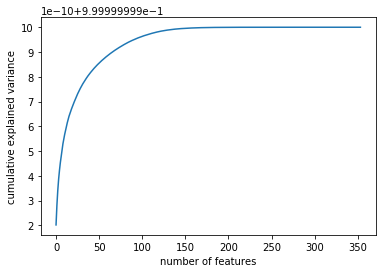

In [21]:
pca = PCA().fit(train1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of features')
plt.ylabel('cumulative explained variance');
plt.show()

In [22]:
pca1 = PCA(n_components=150)

In [23]:
principalComponents = pca1.fit_transform(train1)

In [24]:
principalDf = pd.DataFrame(data = principalComponents, columns= np.arange(150))

In [25]:
principalDf['loss'] = training_data['loss']

In [26]:
training_data.to_csv('t1.csv')

In [29]:
dftrain = spark.read.csv("t1.csv",inferSchema=True,header=True)

In [30]:
assembler = VectorAssembler(
 inputCols=['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',
 'A17',
 'B18',
 'A19',
 'B20',
 'A21',
 'B22',
 'A23',
 'B24',
 'A25',
 'B26',
 'A27',
 'B28',
 'A29',
 'B30',
 'A31',
 'B32',
 'A33',
 'B34',
 'A35',
 'B36',
 'A37',
 'B38',
 'A39',
 'B40',
 'A41',
 'B42',
 'A43',
 'B44',
 'A45',
 'B46',
 'A47',
 'B48',
 'A49',
 'B50',
 'A51',
 'B52',
 'A53',
 'B54',
 'A55',
 'B56',
 'A57',
 'B58',
 'A59',
 'B60',
 'A61',
 'B62',
 'A63',
 'B64',
 'A65',
 'B66',
 'A67',
 'B68',
 'A69',
 'B70',
 'A71',
 'B72',
 'A73',
 'B74',
 'A75',
 'B76',
 'A77',
 'B78',
 'A79',
 'B80',
 'A81',
 'B82',
 'A83',
 'B84',
 'A85',
 'B86',
 'A87',
 'B88',
 'A89',
 'B90',
 'A91',
 'B92',
 'A93',
 'B94',
 'A95',
 'B96',
 'C97',
 'A98',
 'B99',
 'C100',
 'A101',
 'B102',
 'C103',
 'D104',
 'A105',
 'B106',
 'C107',
 'D108',
 'A109',
 'B110',
 'C111',
 'D112',
 'A113',
 'B114',
 'C115',
 'D116',
 'A117',
 'B118',
 'C119',
 'D120',
 'A121',
 'B122',
 'C123',
 'D124',
 'A125',
 'B126',
 'C127',
 'D128',
 'A129',
 'B130',
 'C131',
 'D132',
 'A133',
 'B134',
 'D135',
 'E136',
 'A137',
 'B138',
 'C139',
 'D140',
 'E141',
 'F142',
 'G143',
 'A144',
 'B145',
 'C146',
 'D147',
 'E148',
 'F149',
 'G150',
 'H151',
 'A152',
 'B153',
 'C154',
 'D155',
 'F156',
 'H157',
 'I158',
 'A159',
 'B160',
 'C161',
 'D162',
 'E163',
 'A164',
 'B165',
 'C166',
 'D167',
 'E168',
 'F169',
 'G170',
 'A171',
 'B172',
 'C173',
 'D174',
 'E175',
 'A176',
 'B177',
 'C178',
 'D179',
 'E180',
 'F181',
 'G182',
 'A183',
 'B184',
 'C185',
 'D186',
 'E187',
 'C188',
 'D189',
 'E190',
 'F191',
 'G192',
 'H193',
 'I194',
 'J195',
 'K196',
 'M197',
 'N198',
 'O199',
 'P200',
 'R201',
 'S202',
 'T203',
 'A204',
 'B205',
 'C206',
 'D207',
 'E208',
 'F209',
 'G210',
 'H211',
 'I212',
 'J213',
 'K214',
 'L215',
 'M216',
 'N217',
 'O218',
 'A219',
 'B220',
 'C221',
 'D222',
 'E223',
 'F224',
 'G225',
 'H226',
 'I227',
 'J228',
 'K229',
 'L230',
 'N231',
 'A232',
 'B233',
 'C234',
 'D235',
 'E236',
 'F237',
 'G238',
 'H239',
 'I240',
 'J241',
 'K242',
 'L243',
 'M244',
 'N245',
 'O246',
 'P247',
 'Q248',
 'A249',
 'B250',
 'C251',
 'D252',
 'E253',
 'F254',
 'G255',
 'H256',
 'I257',
 'J258',
 'K259',
 'L260',
 'M261',
 'N262',
 'O263',
 'P264',
 'Q265',
 'R266',
 'S267',
 'T268',
 'A269',
 'B270',
 'C271',
 'D272',
 'E273',
 'F274',
 'G275',
 'H276',
 'I277',
 'J278',
 'K279',
 'L280',
 'M281',
 'N282',
 'O283',
 'P284',
 'R285',
 'A286',
 'B287',
 'C288',
 'D289',
 'E290',
 'F291',
 'G292',
 'H293',
 'I294',
 'J295',
 'K296',
 'L297',
 'M298',
 'N299',
 'O300',
 'P301',
 'Q302',
 'R303',
 'S304',
 'U305',
 'A306',
 'B307',
 'C308',
 'D309',
 'E310',
 'F311',
 'G312',
 'H313',
 'I314',
 'J315',
 'K316',
 'A317',
 'B318',
 'C319',
 'D320',
 'E321',
 'F322',
 'G323',
 'I324',
 'K325',
 'M326',
 'O327',
 'Q328',
 'S329',
 'U330',
 'W331',
 'Y',
 'A333',
 'B334',
 'C335',
 'D336',
 'E337',
 'F338',
 'G339',
 'H340',
 'I341',
 'J342',
 'K343',
 'L344',
 'M345',
 'N346',
 'O347',
 'P348',
 'Q349',
 'R350',
 'S351',
 'T352',
 'U353',
 'W354',
 'X'], outputCol="features")

In [31]:
df1 = assembler.transform(dftrain)

In [32]:
df2= df1.select("features",'loss')

In [33]:
train_data,test_data = df2.randomSplit([0.75,0.25])

In [34]:
lr = LinearRegression(labelCol='loss' ,maxIter= 10000)

In [35]:
lrm = lr.fit(train_data)

In [36]:
result = lrm.evaluate(test_data)

In [37]:
print("Evaluation metrics on Linear Regression model :")
print("Root Mean Square Error(RMSE) = %g "  %result.rootMeanSquaredError)
print("Mean Absolute Error = %g " %result.meanAbsoluteError)
print("R squared value = %g " %result.r2)

Evaluation metrics on Linear Regression model :
Root Mean Square Error(RMSE) = 2042.36 
Mean Absolute Error = 1318.23 
R squared value = 0.490335 


In [38]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [39]:
gbt = GBTRegressor(featuresCol="features",labelCol='loss', maxIter=100)
model = gbt.fit(train_data)

In [40]:
prediction = model.transform(test_data)

In [41]:
print("Evaluation metrics on Gradient Boosting Regression model :")
evaluator = RegressionEvaluator(labelCol="loss", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print("Root Mean Square Error(RMSE) = %g " % rmse)
evaluator2 = RegressionEvaluator(labelCol="loss", predictionCol="prediction", metricName="mae")
mae = evaluator2.evaluate(prediction)
print("Mean Absolute Error = %g " % mae)
evaluator3 = RegressionEvaluator(labelCol="loss", predictionCol="prediction", metricName="r2")
r2 = evaluator3.evaluate(prediction)
print("R squared value = %g " % r2)

Evaluation metrics on Gradient Boosting Regression model :
Root Mean Square Error(RMSE) = 1965.6 
Mean Absolute Error = 1225.3 
R squared value = 0.527921 


In [42]:
rf = RandomForestRegressor(featuresCol="features", labelCol='loss')

In [43]:
model = rf.fit(train_data)

In [44]:
predictions = model.transform(test_data)

In [45]:
print("Evaluation metrics on Random Forest Regression model :")
evaluator4 = RegressionEvaluator(labelCol="loss", predictionCol="prediction", metricName="rmse")
rmse = evaluator4.evaluate(predictions)
print("Root Mean Square Error(RMSE) = %g " % rmse)
evaluator5 = RegressionEvaluator(labelCol="loss", predictionCol="prediction", metricName="mae")
mae = evaluator5.evaluate(predictions)
print("Mean Absolute Error = %g " % mae)
evaluator5 = RegressionEvaluator(labelCol="loss", predictionCol="prediction", metricName="r2")
r2 = evaluator5.evaluate(predictions)
print("R squared value = %g " % r2)

Evaluation metrics on Random Forest Regression model :
Root Mean Square Error(RMSE) = 2149.69 
Mean Absolute Error = 1408.14 
R squared value = 0.435359 
